## Monte Carlo First Visit MC Prediction, for estimating Value, Fig, 5.1

In [1]:
#%%
import numpy as np
import itertools
import pdb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#%%model initialisations
class BlackJack():
    def __init__(self):
        self.action_player = {}
        self.action_dealer = {}
        self.state_value = {}
        self.states = list(itertools.product((np.arange(12,22)),\
                                             (np.arange(2,12)),\
                                             (0,1),repeat = 1))
        self.sa_value = {}
        self.sa_pair = {}
        
        
        
        for i in range(len(self.states)):
            self.state_value[self.states[i]] = np.random.random(1)  
            
        for i in range(len(self.states)):  #Policy for player
            
            temp = self.states[i]
            #pdb.set_trace()
            if temp[0] >=20:
                self.action_player[self.states[i]] = 'stick'         
            else:
                self.action_player[self.states[i]] = 'hit'
                
        for i in range(len(self.states)): #policy for dealer
            temp_dealer = self.states[i]
            if temp_dealer[0] >=17:
                self.action_dealer[self.states[i]] = 'stick'
            else:
                self.action_dealer[self.states[i]] = 'hit'
                
        action_space = ['hit','stick']
        for i in range(len(self.states)):
            for j in range(len(action_space)):
                Q = np.random.rand(1)
                self.sa_value[self.states[i],action_space[j]] = Q
            

        
            
                
def win_lose_draw(player_sum, dealer_sum):
    loop_status = False
    #natural for player and dealer
    if player_sum == dealer_sum == 21:      
        ret = 0
        loop_status = False
    #player wins
    elif player_sum == 21 and (dealer_sum < 21 or dealer_sum > 21):
        ret = 1                 
        loop_status = False
    #player loses
    elif player_sum > 21 and (dealer_sum <=21):
        ret = -1
        loop_status = False
    #player wins with dealer sum>21
    elif dealer_sum > 21 and (player_sum <=21):
        ret = 1
        loop_status = False
    # dealer wins by becoming natural
    elif dealer_sum == 21 and (player_sum < 21 or player_sum > 21):
        ret = -1
        loop_status = False
    #both their sum becomes greater than 21 and game ends in draw
    else:
        ret = False
        loop_status = True
        
    return ret,loop_status

In [4]:
#%%Let's Play Blackjack
player = BlackJack()
Return = {}

# Card choices.
card_ch = {}
card_ch['A'] = 'A'
for i in range(2,11):
    card_ch[str(i)] = i
card_ch['K'] = 10
card_ch['Q'] = 10
card_ch['J'] = 10

episodes = 10000

ret_states = {}
state_iter = list(itertools.product((np.arange(12,22)),\
                                             (np.arange(2,12)),\
                                             (0,1),repeat = 1))

for i in range(len(state_iter)):
    ret_states[state_iter[i]] = []


gamma = 1

for k_epi in range(episodes):
    sa_pair = []
    state_episode = []
    action_episode = []
    reward_episode = []
    
    # Local boolean for loop.
    loop_exit = False
    # First 2 draw of the player and dealer.
    card_choice_player = []
    card_choice_dealer = []
    # Usable ace or not.
    ace_u = 0
        
    for i in range(1,2):
        # Draw card for player.
        card_choice = card_ch[np.random.choice(list(card_ch.keys()))]
        
        # Check if the card is ace or  not for player
        if card_choice == 'A' and i == 1:
            card_choice = 11
        elif card_choice == 'A':
            if card_choice_player[0] == 11:
                card_choice = 1
                ace_u = 0
            else:
                card_choice = 11
                ace_u = 1
        card_choice_player.append(card_choice)
        
        
        # Draw card for dealer.
        card_choice = card_ch[np.random.choice(list(card_ch.keys()))]
        if card_choice == 'A':
            card_choice = 11
        
        card_choice_dealer.append(card_choice)
        
    # Player and dealer sum.
    player_sum = np.sum(card_choice_player)
    dealer_sum = card_choice_dealer[0]
         
    # Variable for player and dealer.
    play_pd = True
    act_p = 'hit'
    loop  = True
    loop_ret = True
    
    while loop==True:
        if player_sum < 12:
            # We will always hit.
            card_choice = card_ch[np.random.choice(list(card_ch.keys()))]
        
            if card_choice == 'A' and (player_sum+11 <=21):
                card_choice = 11
                ace_u = 1
            elif card_choice == 'A':
                card_choice = 1
                ace_u = 0
            card_choice_player.append(card_choice)
            # Player sum
            player_sum = np.sum(card_choice_player)
            
            if player_sum == 21:
                card_choice = card_ch[np.random.choice(list(card_ch.keys()))]
                if card_choice == 'A':
                        card_choice = 11
                card_choice_dealer.append(card_choice)
                
                dealer_sum = np.sum(card_choice_dealer)
                
                [ret, loop_ret] = win_lose_draw(player_sum, dealer_sum)
        
            elif player_sum > 21:
                ret = -1
                loop_ret = False
            
            if loop_ret == False:
                # Append reward.
                reward_episode.append(ret)
                
                new_state = [np.sum(card_choice_player),card_choice_dealer[0],\
                                                                 ace_u]
                state_episode.append(new_state)
                    
                loop = loop_ret
        else:
            loop_exit = True
            
            new_state = [np.sum(card_choice_player),card_choice_dealer[0],ace_u]
            state_episode.append(new_state)
            act_p = player.action_player[tuple(new_state)]
            #pdb.set_trace()
            while act_p == 'hit':
                # Draw card for player.
                card_choice_p = card_ch[np.random.choice(list(card_ch.keys()))]
                
            
                if card_choice_p == 'A':
                    card_choice_p = 1
                    ace_u = 0
                
                card_choice_player.append(card_choice_p)
                
                player_sum = np.sum(card_choice_player)
                
                if player_sum == 21:                    
                    card_choice = card_ch[np.random.choice(list(card_ch.keys()))]
                    if card_choice == 'A':
                            card_choice = 11
                    card_choice_dealer.append(card_choice)
                    dealer_sum = np.sum(card_choice_dealer)
                    
                    [ret, loop_ret] = win_lose_draw(player_sum, dealer_sum)
                    act_p = False
               
                elif player_sum > 21:
                    ret = -1
                    loop_ret = False
                    act_p = False
                else:
                    [ret, loop_ret] = win_lose_draw(player_sum, dealer_sum)
                
                if ret != False:
                    reward_episode.append(ret)
                else:
                    reward_episode.append(0)
                    new_state = [np.sum(card_choice_player),card_choice_dealer[0],\
                                                                 ace_u]
                    state_episode.append(new_state)
                
                    act_p = player.action_player[tuple(new_state)]
                
                loop = loop_ret
                
            while act_p =='stick':
                if dealer_sum < 17:
                    act_d = 'hit'
                    # Draw card for player.
                    card_choice = card_ch[np.random.choice(list(card_ch.keys()))]
                    
                    if card_choice == 'A':
                        card_choice = 11
                        
                    card_choice_dealer.append(card_choice)
                    dealer_sum = np.sum(card_choice_dealer)
                else:
                    act_d = 'stick'
                    
                # Check the return
                if act_d=='stick' and act_p == 'stick' :
                    win = max(dealer_sum,player_sum)
                    if win <= 21 :
                        ret = (win == dealer_sum)*(-1) + (win == player_sum)*(1) + \
                                (win == dealer_sum and win == player_sum)*(0)
                        reward_episode.append(ret)
                        loop = False
                        act_p = False
                elif dealer_sum >=21:
                    [ret, loop_ret] = win_lose_draw(player_sum, dealer_sum)
                    
                    reward_episode.append(ret)
                    act_p = False
                    loop = loop_ret
#First visit MC prediction
    #pdb.set_trace()
    #if tuple(state_episode[0]) in player.state_value.keys():
    #print(reward_episode)
#%%
    if loop_exit == True: 
        G = 0
        counter = 1
        for j in range((len(reward_episode)-1),-1,-1):
            G = gamma*G + reward_episode[j]
            last_value = state_episode[j]
            
            update_G = True
            for k in range(0,len(state_episode)-counter):
                if last_value == state_episode[k]:
                    update_G = False
            counter +=1        
            if update_G:
            
                ret_states[tuple(last_value)].append(G)
                
                player.state_value[tuple(last_value)] = np.mean(ret_states[tuple(last_value)])
            
            
       # if np.mod(k_epi,1) == 0:
        #    print('Episode : ',k_epi)

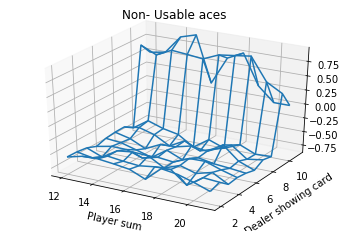

In [6]:
#%%plotting  non-usable aces post 10,000 episodes, rest added in report
x = (itertools.product((np.arange(12,22)),\
                                             (np.arange(2,12)),\
                                             (0,1),repeat = 1))
x = np.linspace(12,21,10)
y = np.linspace(2,11,10)
X, Y = np.meshgrid(x, y)

# No usable ace
Z = np.empty((10,10))

for i in range(len(x)):
    for j in range(len(y)):
        Z[i,j] = player.state_value[int(x[i]),int(y[j]),0]
        
fig = plt.figure()
ax = fig.gca(projection = '3d')

wiref = ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1)
plt.ylabel('Dealer showing card')
plt.xlabel('Player sum') 
plt.title('Non- Usable aces')
 
plt.show()

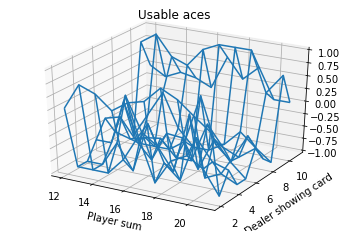

In [7]:
#%%plots for usable aces
x = (itertools.product((np.arange(12,22)),\
                                             (np.arange(2,12)),\
                                             (0,1),repeat = 1))
x = np.linspace(12,21,10)
y = np.linspace(2,11,10)
X, Y = np.meshgrid(x, y)

# No usable ace
Z = np.empty((10,10))

for i in range(len(x)):
    for j in range(len(y)):
        Z[i,j] = player.state_value[int(x[i]),int(y[j]),1]
        
fig = plt.figure()
ax = fig.gca(projection = '3d')

wiref = ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1)
plt.ylabel('Dealer showing card')
plt.xlabel('Player sum') 
plt.title('Usable aces')
plt.show()